#**Data Collection And Loading**

In [ ]:
!pip install scikit-optimize
!pip install xgboost
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from skopt import BayesSearchCV
from skopt.space import Real, Integer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

In [ ]:
dfh = pd.read_csv('/content/hour.csv')

In [ ]:
print("Hour CSV")
dfh.head()

Hour CSV


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
dfh.shape

(17379, 17)

In [ ]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
dfh.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
dfh.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
dfh.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
17374,False
17375,False
17376,False
17377,False


In [ ]:
dfh.duplicated().sum()

np.int64(0)

#**Exploratory Data Analysis (EDA)**

In [ ]:
columns_to_drop = [
    'instant', 'dteday', 'yr', 'casual', 'registered'
]

dfh.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [ ]:
print("hour.csv After Feature Removal")
dfh.head()

hour.csv After Feature Removal


,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [ ]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   mnth        17379 non-null  int64  
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 1.6 MB


**Checking And Deleting NULL Values**

In [ ]:
print("Null values in hour.csv dataset:\n", dfh.isnull().sum())

Null values in hour.csv dataset:
 season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Checking & Removing Duplicates**

In [ ]:
print("Duplicates in hour.csv dataset:", dfh.duplicated().sum())

Duplicates in hour.csv dataset: 2


In [ ]:
dfh = dfh.drop_duplicates(keep='first')

print("Number of duplicates after dropping:", dfh.duplicated().sum())

Number of duplicates after dropping: 0


**Detect & Remove Outliers using IQR**

In [ ]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [ ]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df


**Outlier Detection For hour.csv**

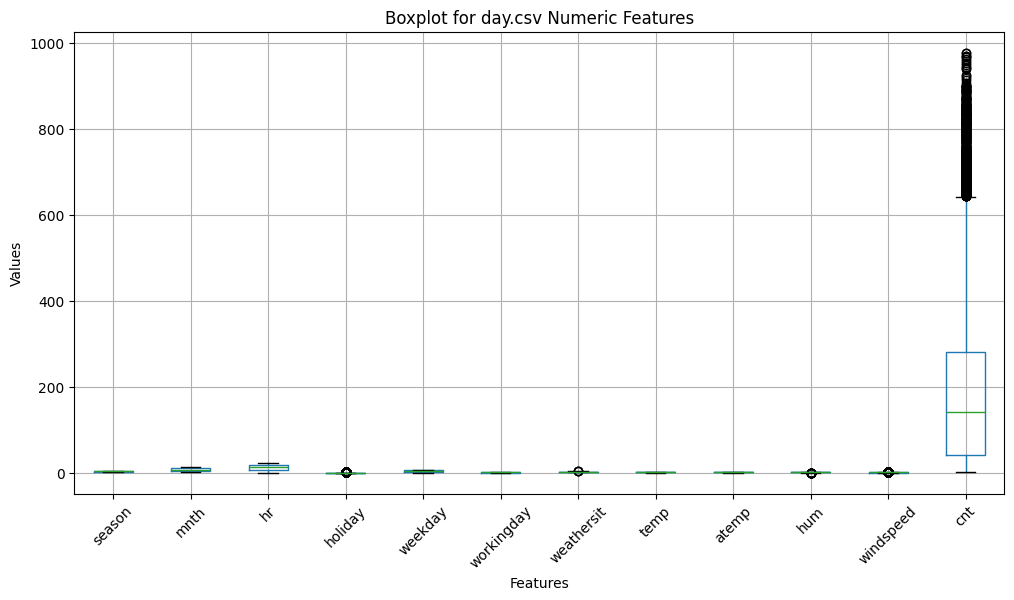

In [ ]:
plt.figure(figsize=(12, 6))
dfh.boxplot()
plt.title("Boxplot for day.csv Numeric Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [ ]:
dfh = remove_outliers(dfh, numeric_cols)

In [ ]:
print(dfh.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16533 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      16533 non-null  int64  
 1   mnth        16533 non-null  int64  
 2   hr          16533 non-null  int64  
 3   holiday     16533 non-null  int64  
 4   weekday     16533 non-null  int64  
 5   workingday  16533 non-null  int64  
 6   weathersit  16533 non-null  int64  
 7   temp        16533 non-null  float64
 8   atemp       16533 non-null  float64
 9   hum         16533 non-null  float64
 10  windspeed   16533 non-null  float64
 11  cnt         16533 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 1.6 MB
None


**Boxplots After Outlier Removal**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'season'),
  Text(1, 0, 'mnth'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'holiday'),
  Text(4, 0, 'weekday'),
  Text(5, 0, 'workingday'),
  Text(6, 0, 'weathersit'),
  Text(7, 0, 'temp'),
  Text(8, 0, 'atemp'),
  Text(9, 0, 'hum'),
  Text(10, 0, 'windspeed'),
  Text(11, 0, 'cnt')])

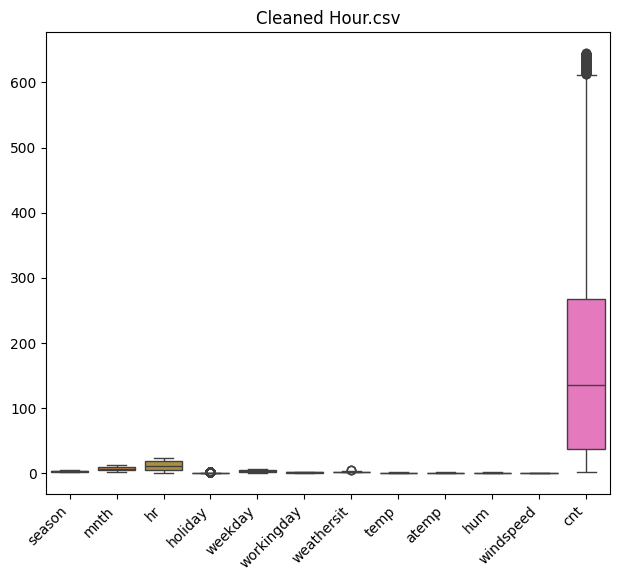

In [ ]:
plt.figure(figsize=(16, 6))   # wider figure

plt.subplot(1, 2, 1)
sns.boxplot(data=dfh.select_dtypes(include='number'))
plt.title("Cleaned Hour.csv")
plt.xticks(rotation=45, ha='right')   # rotate labels

**HISTOGRAMS**

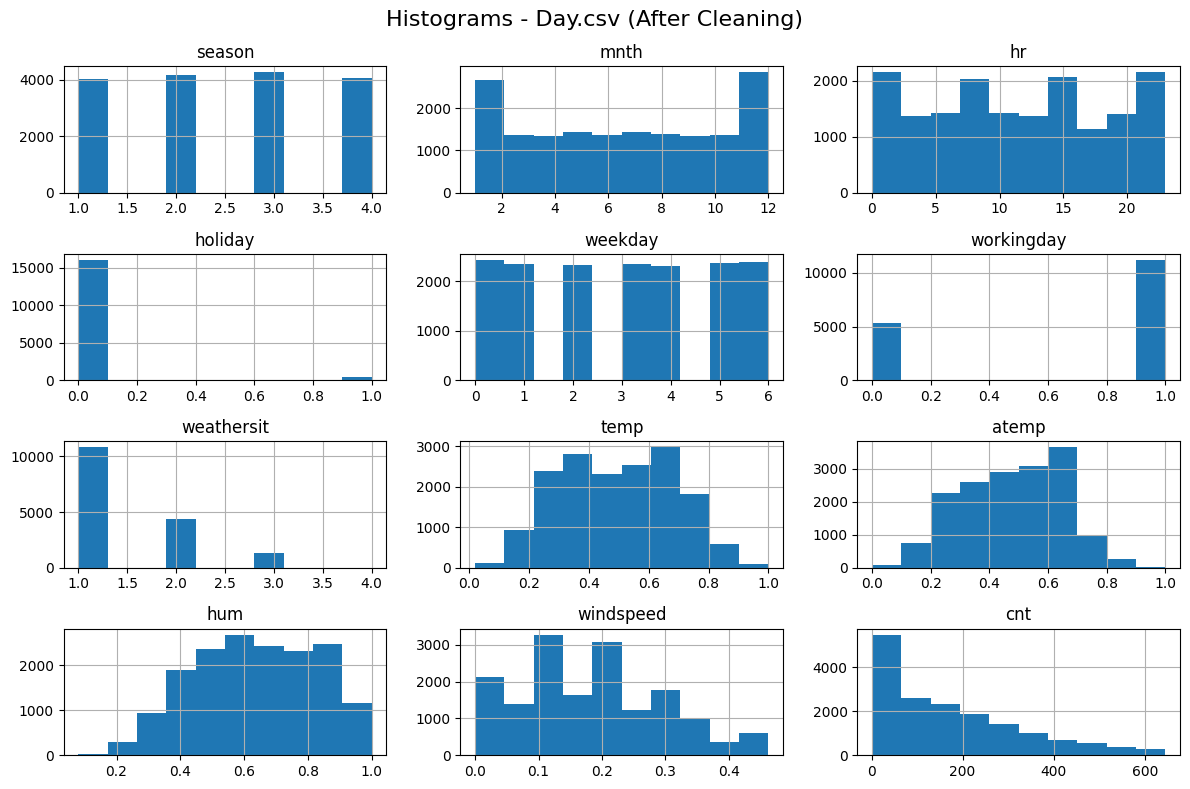

In [ ]:
# --------- HOUR.CSV HISTOGRAMS ---------
dfh.select_dtypes(include='number').hist(figsize=(12, 8))
plt.suptitle("Histograms - Day.csv (After Cleaning)", fontsize=16)
plt.tight_layout()
plt.show()

**Pairplot**

<Figure size 640x480 with 0 Axes>

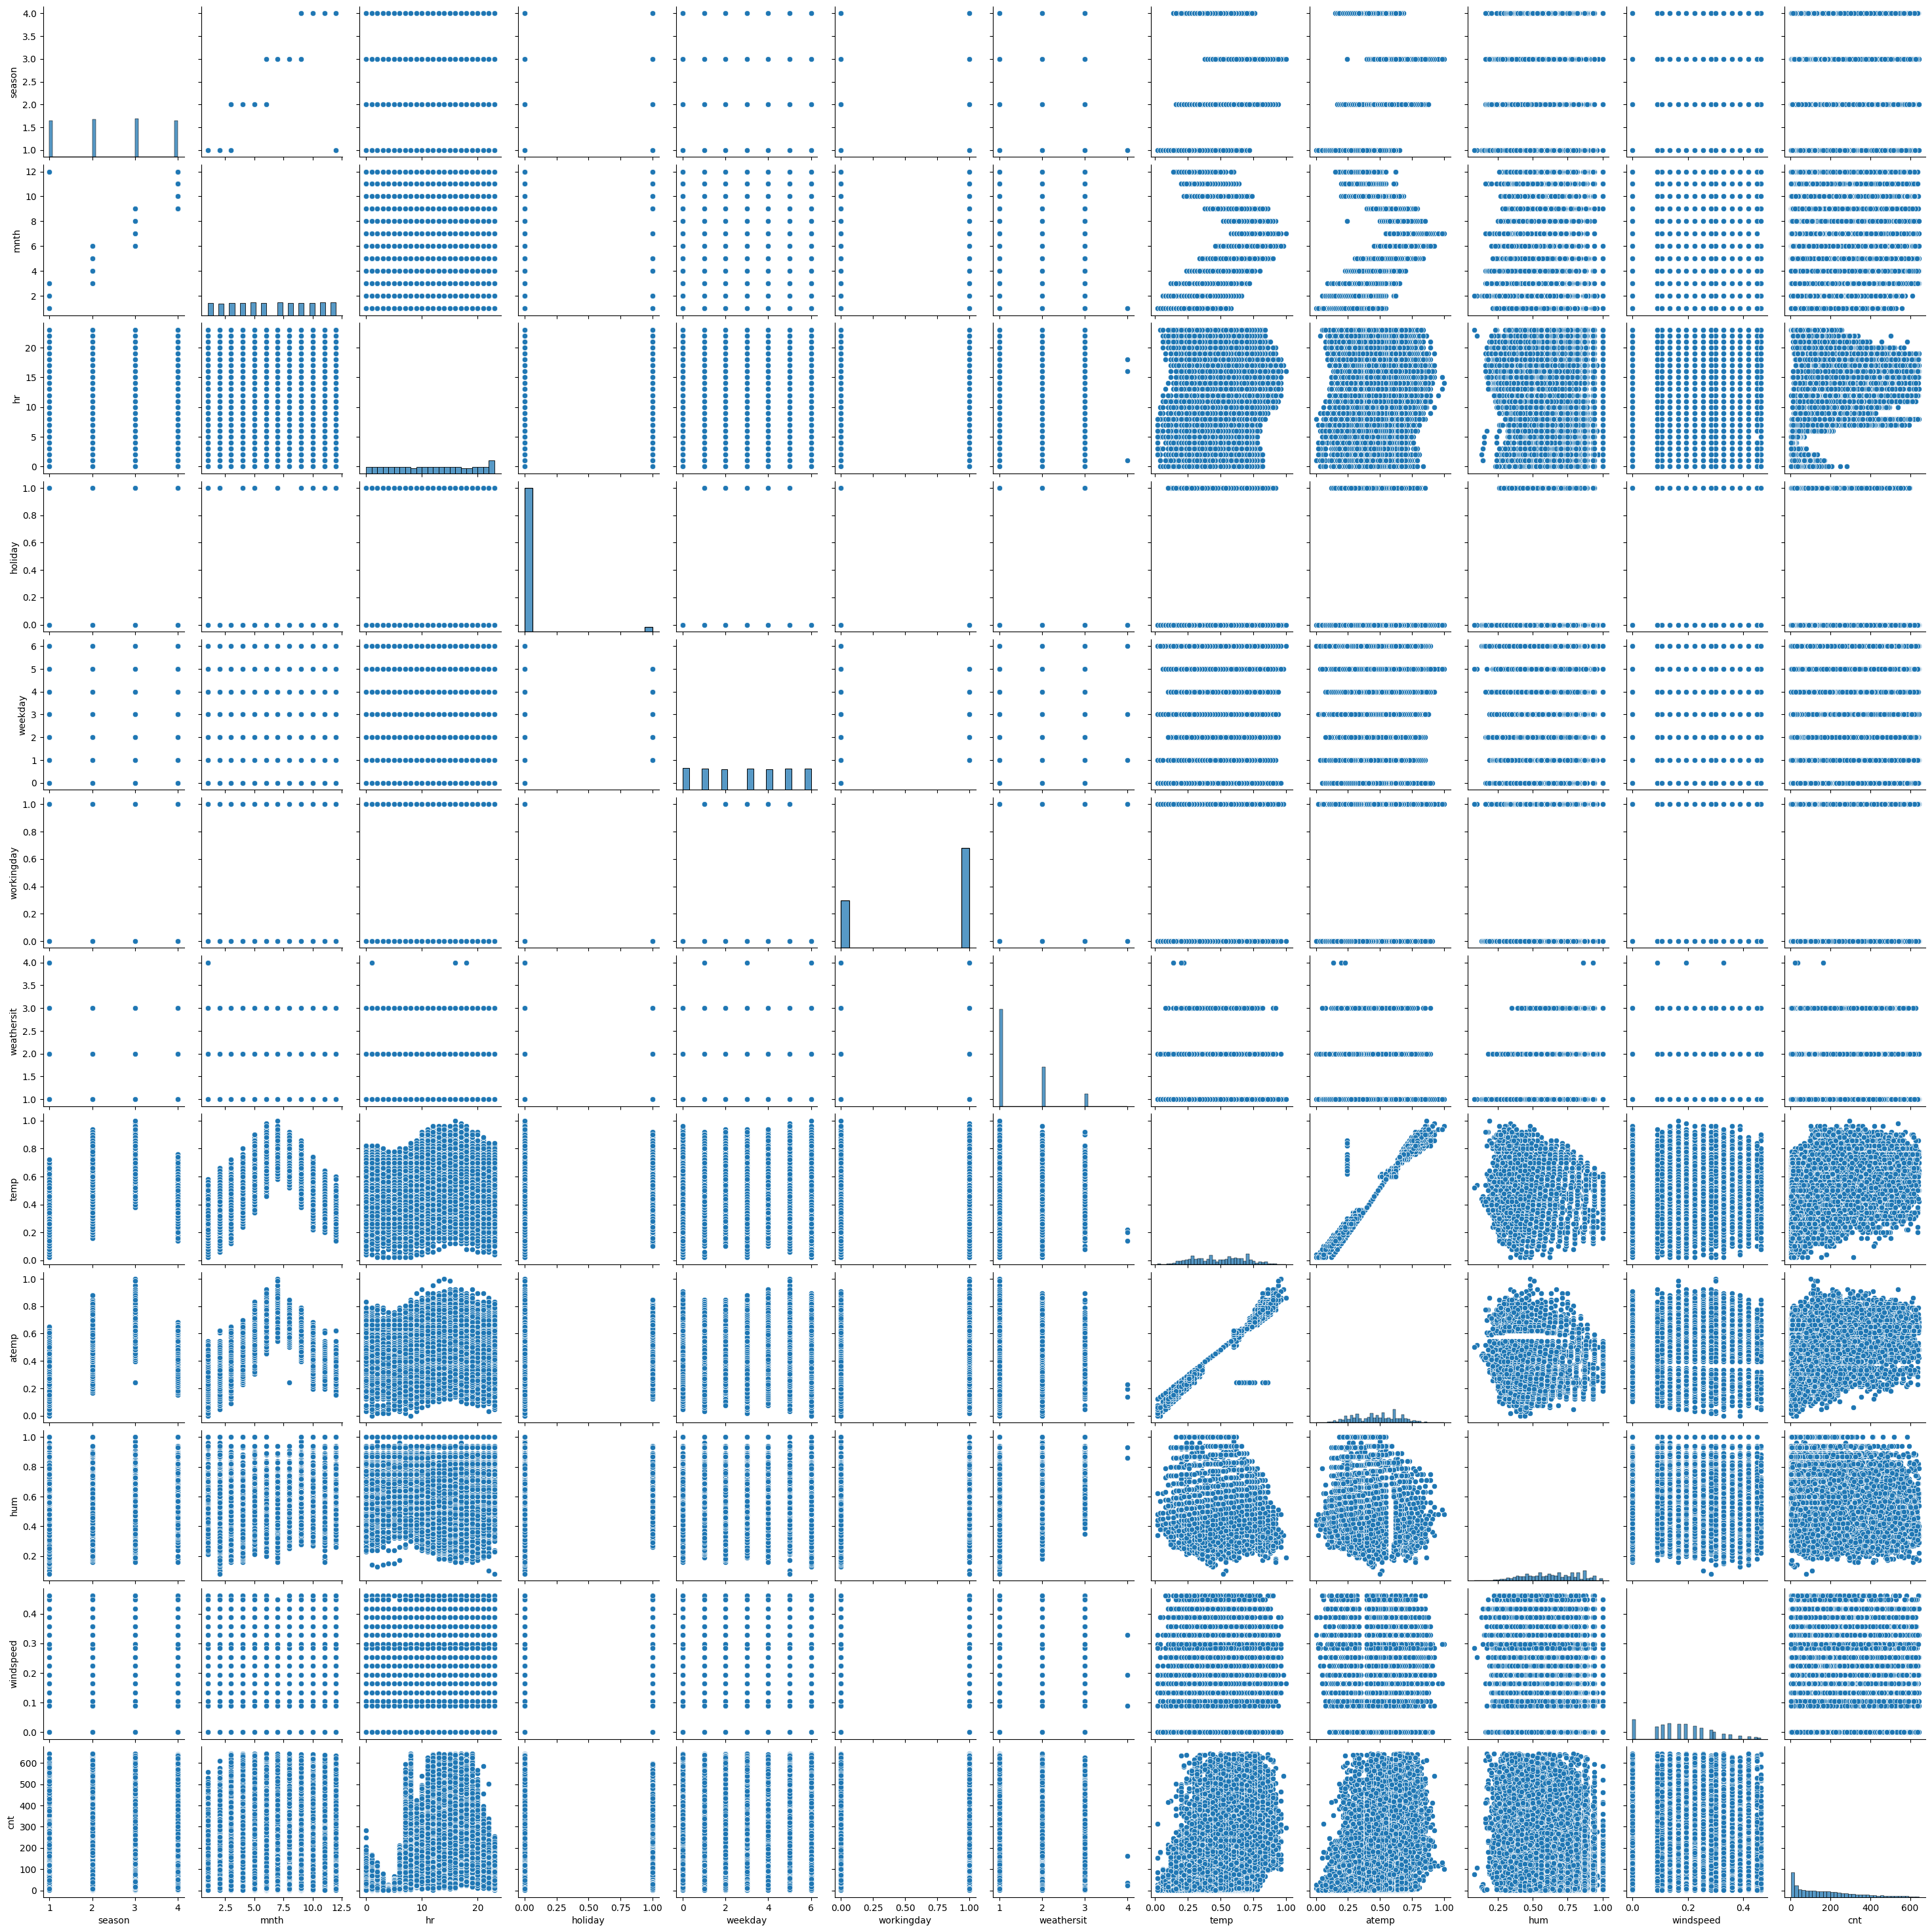

In [ ]:
plt.suptitle("Pairplot- Hour.csv (After Cleaning)", fontsize=16)
sns.pairplot(dfh.select_dtypes(include='number'))
plt.show()

In [ ]:
dfh.to_csv("hour_feature_engineered.csv", index=False)

In [ ]:
dfh = pd.read_csv('/content/hour_feature_engineered.csv')

In [ ]:
dfh.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [ ]:
dfh.isnull().sum()

,0
season,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,0


# **Model Training And Evaluations**

In [ ]:
dfh.columns

Index(['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [ ]:
features = [
    'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'
]

In [ ]:
def evaluate_models(df, label="Dataset"):
    """
    Evaluate multiple regression models using TRAINING + TESTING metrics.
    Returns:
    1. Performance table
    2. y_test
    3. Dictionary of test predictions for each model
    """

    X = df.drop("cnt", axis=1)
    y = df["cnt"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(alpha=1.0),
        "Lasso Regression": Lasso(alpha=0.001),
        "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.5),
        "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
        "SVR (RBF Kernel)": SVR(kernel="rbf", C=100, epsilon=0.1),
        "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "XGBoost": XGBRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            objective="reg:squarederror"
        ),
        "LightGBM": LGBMRegressor(
            n_estimators=500,
            learning_rate=0.05,
            num_leaves=64,
            max_depth=-1,
            subsample=0.8,
            colsample_bytree=0.8,
            force_col_wise=True,
            verbose=-1
        )
    }

    results = []
    predictions = {}

    for name, model in models.items():
        model.fit(X_train, y_train)

        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)

        predictions[name] = pred_test

        results.append([
            name,
            np.sqrt(mean_squared_error(y_train, pred_train)),
            np.sqrt(mean_squared_error(y_test, pred_test)),
            mean_absolute_error(y_train, pred_train),
            mean_absolute_error(y_test, pred_test),
            r2_score(y_train, pred_train),
            r2_score(y_test, pred_test)
        ])

    df_results = pd.DataFrame(
        results,
        columns=[
            "Model",
            "Train RMSE", "Test RMSE",
            "Train MAE", "Test MAE",
            "Train R²", "Test R²"
        ]
    )

    print(f"===== Detailed Performance Comparison: {label} =====")
    print(df_results)

    return df_results, y_test, predictions

In [ ]:
import matplotlib.pyplot as plt
import math

def plot_all_models(y_test, preds_dict, title_prefix="Day Dataset", n_samples=200):
    models = list(preds_dict.keys())
    n_models = len(models)

    cols = 2
    rows = math.ceil(n_models / cols)

    # Take only first n samples
    y_plot = y_test.values[:n_samples]

    plt.figure(figsize=(14, rows * 3))

    for i, model in enumerate(models, 1):
        plt.subplot(rows, cols, i)
        plt.plot(y_plot, label="Actual", color="black", linewidth=2)
        plt.plot(preds_dict[model][:n_samples], label="Predicted", alpha=0.8)
        plt.title(model)
        plt.xlabel("Sample Index")
        plt.ylabel("cnt")
        plt.legend()

    plt.suptitle(
        f"Actual vs Predicted — {title_prefix} (First {n_samples} Samples)",
        fontsize=16
    )
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [ ]:
results_hour_df, y_hour_test, preds_hour = evaluate_models(dfh, "Hour Dataset (Advanced FE)")

===== Detailed Performance Comparison: Hour Dataset (Advanced FE) =====
               Model  Train RMSE   Test RMSE  Train MAE   Test MAE  Train R²   Test R²
0  Linear Regression  124.037631  125.369475  94.316521  95.037120  0.369425  0.345402
1   Ridge Regression  124.038518  125.368539  94.321185  95.047040  0.369416  0.345411
2   Lasso Regression  124.037633  125.368902  94.316718  95.037092  0.369425  0.345408
3         ElasticNet  124.049438  125.361959  94.346059  95.069962  0.369305  0.345480
4      KNN Regressor   55.803428   68.561895  37.603569  46.054672  0.872370  0.804225
5   SVR (RBF Kernel)  106.960393  109.163180  69.162520  69.596639  0.531105  0.503701
6      Random Forest   21.507735   56.992213  14.353142  37.943486  0.981041  0.864723
7  Gradient Boosting   71.853508   72.725253  50.729387  51.568180  0.788395  0.779727
8            XGBoost   46.642583   55.225253  32.264263  37.926872  0.910835  0.872982
9           LightGBM   35.161724   52.036587  24.354209  3

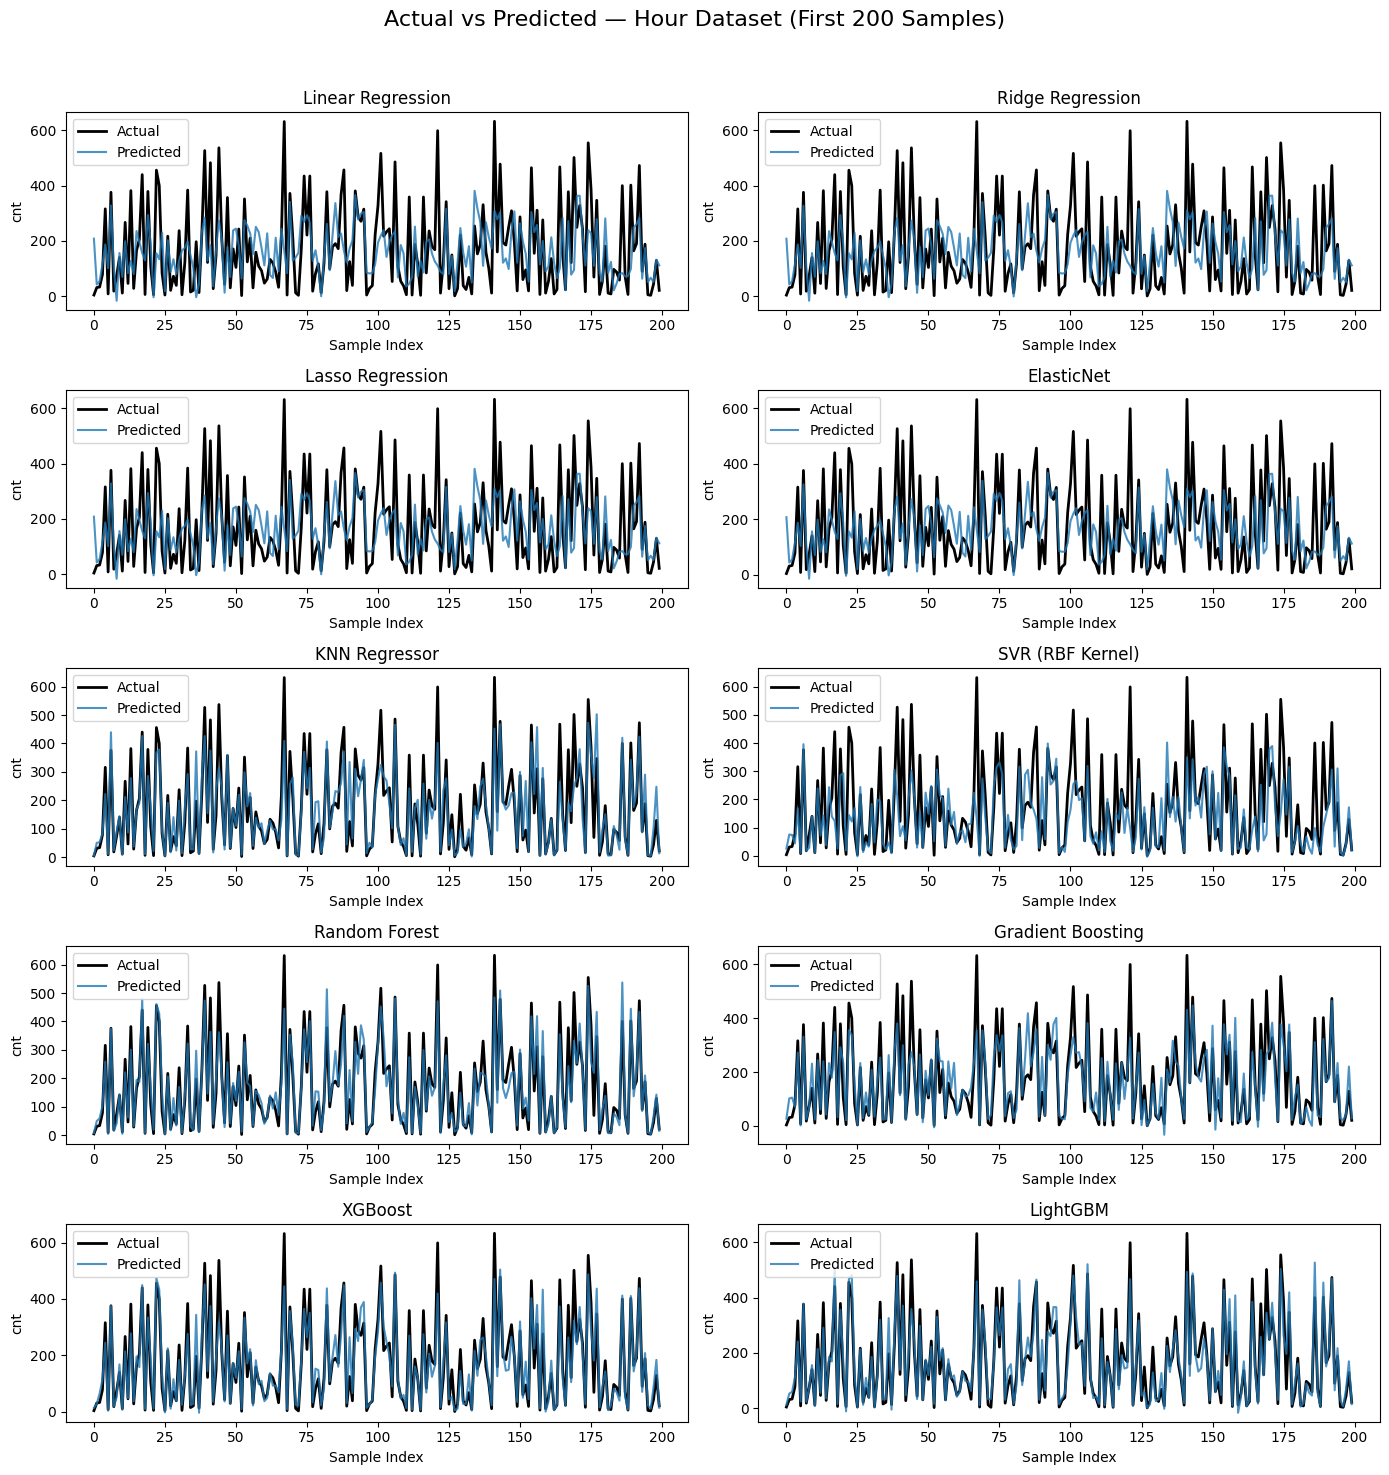

In [ ]:
plot_all_models(y_hour_test, preds_hour, "Hour Dataset", n_samples=200)

#**Hyperparameter Tuning**

In [ ]:
X = dfh.drop("cnt", axis=1)
y = dfh["cnt"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Models**

In [ ]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42, tree_method="hist", verbosity=0),
    "LightGBM": LGBMRegressor(random_state=42, n_jobs=-1)
}

**Grid Search**

In [ ]:
grid_params = {
    "Random Forest": {
        "n_estimators": [200, 400],
        "max_depth": [10, 15],
        "min_samples_leaf": [3, 5]
    },
    "XGBoost": {
        "n_estimators": [200, 250],
        "learning_rate": [0.03, 0.05],
        "max_depth": [3, 4]
    },
    "LightGBM": {
        "n_estimators": [200, 300],
        "learning_rate": [0.03, 0.05],
        "max_depth": [4, 6]
    }
}

**Randomized Search**

In [ ]:
random_params = {
    "Random Forest": {
        "n_estimators": range(200, 401, 50),
        "max_depth": range(8, 21, 4),
        "min_samples_leaf": range(3, 6)
    },
    "XGBoost": {
        "n_estimators": range(200, 301, 50),
        "learning_rate": np.linspace(0.03, 0.05, 3),
        "max_depth": range(3, 5),
        "min_child_weight": [5, 7]
    },
    "LightGBM": {
        "n_estimators": range(200, 401, 50),
        "learning_rate": np.linspace(0.03, 0.05, 3),
        "max_depth": range(4, 7),
        "num_leaves": range(20, 41, 10),
        "subsample": np.linspace(0.7, 0.9, 3),
        "colsample_bytree": np.linspace(0.6, 0.8, 3)
    }
}

**Bayesian Optimization**

In [ ]:
bayes_params = {
    "Random Forest": {
        "n_estimators": Integer(200, 400),
        "max_depth": Integer(10, 20),
        "min_samples_leaf": Integer(3, 5)
    },
    "XGBoost": {
        "n_estimators": Integer(200, 300),
        "learning_rate": Real(0.03, 0.05),
        "max_depth": Integer(3, 4),
        "min_child_weight": Integer(5, 7)
    },
    "LightGBM": {
        "n_estimators": Integer(200, 400),
        "learning_rate": Real(0.03, 0.05),
        "max_depth": Integer(4, 6),
        "num_leaves": Integer(20, 40),
        "subsample": Real(0.7, 0.9),
        "colsample_bytree": Real(0.6, 0.8)
    }
}

**Unified Evaluation Function**

In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    return {
        "Train RMSE": np.sqrt(mean_squared_error(y_train, pred_train)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, pred_test)),
        "Train MAE": mean_absolute_error(y_train, pred_train),
        "Test MAE": mean_absolute_error(y_test, pred_test),
        "Train R²": r2_score(y_train, pred_train),
        "Test R²": r2_score(y_test, pred_test),
    }


**Master Tuning Function**

In [ ]:
def tune_all_models_with_methods(dfd_fe, label="Dataset"):

    final_results = []
    best_models = {}

    for name, base_model in models.items():
        print(f"\n ****** {name} — {label} ******")

        tuning_strategies = []

        if name in grid_params:
            tuning_strategies.append((
                "Grid Search",
                GridSearchCV(base_model, grid_params[name], cv=3, scoring="r2", n_jobs=-1)
            ))

        if name in random_params:
            tuning_strategies.append((
                "Random Search",
                RandomizedSearchCV(
                    base_model,
                    random_params[name],
                    n_iter=15,
                    cv=3,
                    scoring="r2",
                    n_jobs=-1,
                    random_state=42
                )
            ))

        if name in bayes_params:
            tuning_strategies.append((
                "Bayesian Optimization",
                BayesSearchCV(
                    base_model,
                    bayes_params[name],
                    n_iter=20,
                    cv=3,
                    scoring="r2",
                    n_jobs=-1,
                    random_state=42
                )
            ))

        for method_name, search in tuning_strategies:
            search.fit(X_train, y_train)
            best_model = search.best_estimator_

            # Save trained model
            best_models[(name, method_name)] = best_model

            metrics = evaluate(best_model, X_train, X_test, y_train, y_test)

            final_results.append([
                name,
                method_name,
                metrics["Train RMSE"],
                metrics["Test RMSE"],
                metrics["Train MAE"],
                metrics["Test MAE"],
                metrics["Train R²"],
                metrics["Test R²"],
            ])

    results_df = pd.DataFrame(
        final_results,
        columns=[
            "Model", "Tuning Method",
            "Train RMSE", "Test RMSE",
            "Train MAE", "Test MAE",
            "Train R²", "Test R²"
        ]
    )

    return results_df, best_models


**FINAL TUNED RESULTS (HOUR)**

In [ ]:
hour_results, hour_best_models = tune_all_models_with_methods(dfh, "Hour Dataset")
hour_results


 ****** Random Forest — Hour Dataset ******

 ****** XGBoost — Hour Dataset ******

 ****** LightGBM — Hour Dataset ******


,Model,Tuning Method,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
0,Random Forest,Grid Search,40.304995,57.684175,27.065924,39.227069,0.933419,0.861419
1,Random Forest,Random Search,36.458701,57.278972,24.217047,38.629402,0.945521,0.863359
2,Random Forest,Bayesian Optimization,36.665175,57.277186,24.405680,38.660709,0.944902,0.863367
3,XGBoost,Grid Search,61.474940,63.624664,42.894669,44.545971,0.845109,0.831406
4,XGBoost,Random Search,60.380855,62.667274,42.042320,43.812771,0.850573,0.836442
5,XGBoost,Bayesian Optimization,60.380855,62.667274,42.042320,43.812771,0.850573,0.836442
6,LightGBM,Grid Search,51.114429,56.296565,35.524154,38.976349,0.892918,0.868006
7,LightGBM,Random Search,51.860413,57.080186,36.316114,39.972358,0.889769,0.864306
8,LightGBM,Bayesian Optimization,48.676571,55.990063,33.757778,38.602608,0.902889,0.869439


# **Prediction Strategy & Forecasting Logic**

**Overfit Gap** = | R²_train − R²_test |

**Final Score** = R²_test − λ × | R²_train − R²_test |

**λ - overfitting penalty**

In [ ]:
def get_best_model(results_df, best_models, overfit_penalty=0.5):
    """
    Selects best model based on:
    - High Test R²
    - Low Train–Test R² gap (generalization)
    - Production readiness
    """

    df = results_df.copy()

    # Overfitting gap
    df["Overfit_Gap"] = abs(df["Train R²"] - df["Test R²"])

    # Final production score
    df["Final_Score"] = df["Test R²"] - overfit_penalty * df["Overfit_Gap"]

    # Sort by final score
    best_row = df.sort_values("Final_Score", ascending=False).iloc[0]

    model_name = best_row["Model"]
    tuning_method = best_row["Tuning Method"]
    best_model = best_models[(model_name, tuning_method)]

    print("Model Selection Reasoning")
    print(f"Model           : {model_name}")
    print(f"Tuning Method   : {tuning_method}")
    print(f"Test R²         : {best_row['Test R²']:.4f}")
    print(f"Overfit Gap     : {best_row['Overfit_Gap']:.4f}")
    print(f"Final Score     : {best_row['Final_Score']:.4f}")

    return model_name, tuning_method, best_model


**Model Predictions Hourly Bases**

In [ ]:
def update_engineered_features_hour(row):
    """
    Update cyclic and lag-independent features based on current row.
    Lag features are updated separately in the recursive function.
    """
    # --- Cyclic features ---
    row["mnth_sin"] = np.sin(2 * np.pi * row["mnth"] / 12)
    row["mnth_cos"] = np.cos(2 * np.pi * row["mnth"] / 12)
    row["weekday_sin"] = np.sin(2 * np.pi * row["weekday"] / 7)
    row["weekday_cos"] = np.cos(2 * np.pi * row["weekday"] / 7)
    row["hr_sin"] = np.sin(2 * np.pi * row["hr"] / 24)
    row["hr_cos"] = np.cos(2 * np.pi * row["hr"] / 24)

    return row

In [ ]:
# --- Recursive multi-step forecast for hourly data ---
def recursive_forecast_hour(model, last_known_row, features, steps=24):
    """
    Predict multiple future hours recursively using last known row.

    Parameters:
    -----------
    model : trained regression model
    last_known_row : pd.Series with all features (including lag and cyclic)
    features : list of feature column names used by the model
    steps : number of future hours to predict

    Returns:
    --------
    List of predicted counts
    """
    history = last_known_row.copy()
    preds = []

    for _ in range(steps):
        # --- Predict next hour ---
        X = history[features].values.reshape(1, -1)
        pred = model.predict(X)[0]
        preds.append(pred)

        # --- Update lag features safely (no future leakage) ---
        # Shift previous lag values
        history["cnt_lag_168"] = history.get("cnt_lag_24", 0)
        history["cnt_lag_24"] = history.get("cnt_lag_1", 0)
        history["cnt_lag_1"] = pred

        # Update rolling mean features incrementally
        history["cnt_roll_mean_3"] = (
            (history.get("cnt_roll_mean_3", pred) * 2 + pred) / 3
        )
        history["cnt_roll_mean_24"] = (
            (history.get("cnt_roll_mean_24", pred) * 23 + pred) / 24
        )

        # Advance cyclic time
        history["hr"] = (history["hr"] + 1) % 24
        history["weekday"] = (history["weekday"] + (history["hr"] == 0)) % 7
        history["mnth"] = (history["mnth"] + (history["hr"] == 0 and history["weekday"] == 0)) % 12
        if history["mnth"] == 0:
            history["mnth"] = 12

        # Recompute cyclic features for the new row
        history = update_engineered_features_hour(history)

    return preds


In [ ]:
def format_hour(hour):
    if hour == 0:
        return "12 AM"
    elif hour < 12:
        return f"{hour} AM"
    elif hour == 12:
        return "12 PM"
    else:
        return f"{hour - 12} PM"

In [ ]:
def predict_next_6_hours(model, df_fe, user_input):
    """
    Predict next 6 hours with real clock time labels.

    df_fe → fully engineered hourly dataframe used for training
    user_input → raw controllable inputs (hr, weekday, mnth, etc.)
    """

    # Take last known engineered row
    last_row = df_fe.iloc[-1].copy()

    # Replace controllable inputs
    for k, v in user_input.items():
        last_row[k] = v

    # Update cyclic features
    last_row = update_engineered_features_hour(last_row)

    # Recursive forecasting
    preds = recursive_forecast_hour(
        model=model,
        last_known_row=last_row,
        features=features,
        steps=6
    )

    # Hour labels
    start_hour = user_input["hr"]
    hour_labels = [format_hour((start_hour + i) % 24) for i in range(6)]

    return pd.DataFrame({
        "Time": hour_labels,
        "Predicted cnt": np.round(preds, 2)
    })


In [ ]:
hour_input = {
    "season": 1,
    "mnth": 1,
    "hr": 10,
    "holiday": 0,
    "weekday": 2,
    "workingday": 1,
    "weathersit": 1,
    "temp": 0.24,
    "atemp": 0.2879,
    "hum": 0.81,
    "windspeed": 0.00
}


In [ ]:
model_name, tuning_method, best_hour_model = get_best_model(
    hour_results, hour_best_models
)

print(f"Best Model: {model_name}")
print(f"Tuning Method: {tuning_method}")

print("\nHourly Forecast")
print(
    predict_next_6_hours(
    model=best_hour_model,
    df_fe=dfh,
    user_input=hour_input
    )
)

Model Selection Reasoning
Model           : LightGBM
Tuning Method   : Grid Search
Test R²         : 0.8680
Overfit Gap     : 0.0249
Final Score     : 0.8555
Best Model: LightGBM
Tuning Method: Grid Search

Hourly Forecast
    Time  Predicted cnt
0  10 AM          78.99
1  11 AM          76.88
2  12 PM          82.61
3   1 PM          80.98
4   2 PM          62.93
5   3 PM          76.52


**Save The Model**

In [ ]:
import joblib
joblib.dump(best_hour_model, "bike_hour_demand_model.pkl")

['bike_hour_demand_model.pkl']